In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, losses
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [11]:
#define a simple CNN model
def create_model():
  model=keras.Sequential([
      layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.MaxPooling2D((2,2)),
      layers.Flatten(),
      layers.Dense(64, activation='relu'),
      layers.Dense(10, activation='softmax')
  ])
  return model


In [12]:
optimizers_list={
    "SGD": optimizers.SGD(),
    "Adam": optimizers.Adam(),
    "RMSprop": optimizers.RMSprop()
}
results={}


In [16]:
for opt_name, opt in optimizers_list.items():
    print(f"Training with,{opt_name} optimizer...")
    model=create_model()
    model.compile(optimizer=opt, loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

    history=model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=1)
    results[opt_name]=history.history['val_accuracy']


Training with,SGD optimizer...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.6666 - loss: 1.0854 - val_accuracy: 0.9501 - val_loss: 0.1685
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9504 - loss: 0.1667 - val_accuracy: 0.9686 - val_loss: 0.1035
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9660 - loss: 0.1078 - val_accuracy: 0.9757 - val_loss: 0.0773
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9742 - loss: 0.0838 - val_accuracy: 0.9788 - val_loss: 0.0652
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9775 - loss: 0.0737 - val_accuracy: 0.9812 - val_loss: 0.0543
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9809 - loss: 0.0626 - val_accuracy: 0.9840 - val_loss: 0.0506
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.9827 - loss: 0.0558 - val_accuracy: 0.9863 - val_loss: 0.0447
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s

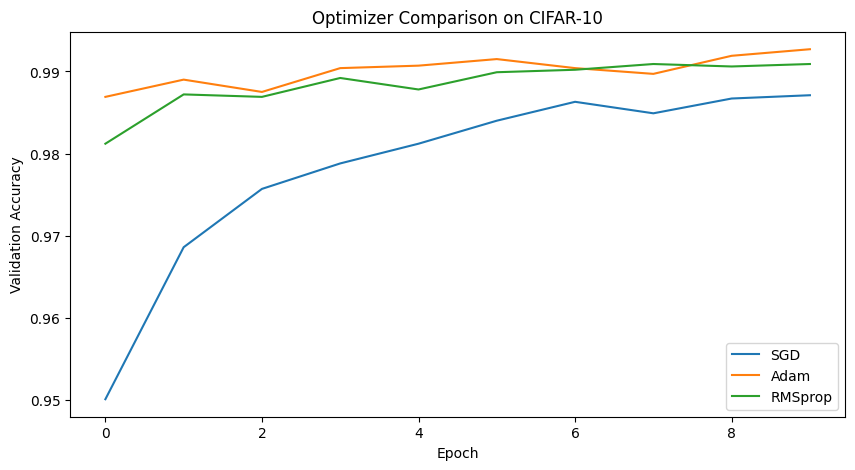

In [17]:
plt.figure(figsize=(10,5))
for opt_name, acc in results.items():
  plt.plot(acc, label=opt_name)
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.title("Optimizer Comparison on CIFAR-10")
plt.show()